In [1]:
#Note Boyd References a value of 5.7 * 10^-20 likely measured at 1064 nm or 532 nm

from os import path
from copy import deepcopy

from IPython.display import Math, Latex
import sympy as sp
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sympy import init_printing

import get_effective_freq_dependence_from_raw_output as main

init_printing()

In [2]:
def eV_and_hartree(df):
    df_ev = deepcopy(df)
    df_hartree = deepcopy(df)
    
    df_ev.index = df_ev['freq (eV)']
    df_hartree = df_hartree.drop('freq (eV)', 1)
    
    df_hartree.index = df_hartree['freq (Hartree)']
    df_ev = df_ev.drop('freq (Hartree)', 1)
    return df_ev, df_hartree

def plot_data_frames(dataframes, labels, descripter, x_axis='freq (eV)', display_the_dfs=False,
                     plot_measured_ground_state=False, colors=['b','g','r','c','m','k'], ticks=['+','x'], alpha=0.5):
    assert(len(dataframes) == len(labels))
    ticklen = len(ticks)
    colorlen = len(colors)
    
    if display_the_dfs:
        for df in dataframes:
            display(df)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10.5, 3.6))
    sup_title = "Calculated Rotationally Averaged 3rd Order Response\nDunning Double Zeta Basis"
    fig.suptitle(sup_title, y=1.35, fontsize=24)
    plt.tight_layout()
    fig.subplots_adjust(hspace=0, wspace=0.3)
    
    for index, df in enumerate(dataframes):
        markers = colors[index%colorlen] + ticks[index%ticklen]
        axes[0].plot(df[x_axis], df['gamma effective'], markers, label=labels[index])
    y_label = "$\gamma_{\t_{eff}}$ (au.)"
    x_label = x_axis
    axes[0].set_title("{1} {0}".format("$\gamma_{\t_{effective}}$", descripter), fontsize=24, y=1.13)
    axes[0].tick_params(labelsize=13)
    axes[0].set_ylabel(y_label, fontsize=20)
    axes[0].set_xlabel(x_label, fontsize=20)
    axes[0].legend()

    for index, df in enumerate(dataframes):
        markers = colors[index%colorlen] + ticks[index%ticklen]
        axes[1].plot(df[x_axis], df['chi3 effective'], markers, label=labels[index])
    if plot_measured_ground_state:
        axes[1].plot([1.1653], [5.7*10**(-20)], 'ro', label="reported ground state")
    x_label = "freq (eV)"
    y_label = "$\chi^{(3)}_{\t_{eff}}}$ (SI)"
    axes[1].set_title("{1} {0}".format("$\chi^{(3)}_{\t_{eff}}}$", descripter), fontsize=24, y=1.13)
    axes[1].tick_params(labelsize=13)
    axes[1].set_ylabel(y_label, fontsize=20)
    axes[1].set_xlabel(x_label, fontsize=20)
    axes[1].legend()
    plt.show()

In [3]:
def get_dfs(dir_path, output_file_name='effective_chi3_freq_response_NBopt_dunningZ_2.csv'):
    output_df = main.main(dir_path, output_file_name, True)
    good_df = output_df[output_df.warning_flag != True]
    return output_df, good_df

output_df_state2, good_df_state2 = get_dfs('NB_excited_S1_state_freq_dependence')
output_df_state1, good_df_state1 = get_dfs('NB_ground_state_freq_dependence')
output_df_freq_perm, good_df_freq_perm = get_dfs('freq_permutations')
output_df_freq_EUV, good_df_freq_EUV = get_dfs('NB_EUV_freq_dep')

saving data to -> NB_excited_S1_state_freq_dependence\effective_chi3_freq_response_NBopt_dunningZ_2.csv
saving data to -> NB_ground_state_freq_dependence\effective_chi3_freq_response_NBopt_dunningZ_2.csv
saving data to -> freq_permutations\effective_chi3_freq_response_NBopt_dunningZ_2.csv
saving data to -> NB_EUV_freq_dep\effective_chi3_freq_response_NBopt_dunningZ_2.csv


,freq (Hartree),freq (eV),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.292100,7.948446,0.0,2.817736e+07,2.111003e-14,True
1,0.330333,8.988828,0.0,2.760576e+07,1.761667e-17,True
2,0.368567,10.029210,0.0,-3.393186e+07,-8.502089e-22,True


,freq (Hartree),freq (eV),freq_permutation,gamma effective,chi3 effective,warning_flag


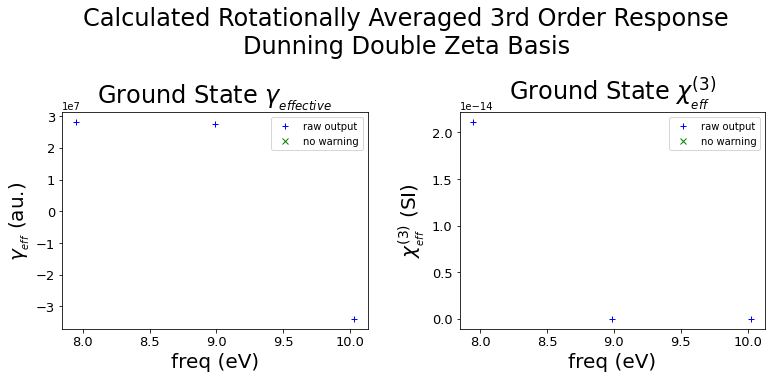

In [7]:
plot_data_frames([output_df_freq_EUV, good_df_freq_EUV],
                 ['raw output', 'no warning'],
                 "Ground State",
                 plot_measured_ground_state=False,
                display_the_dfs=True)

b 0
+ 0
g 1
x 1


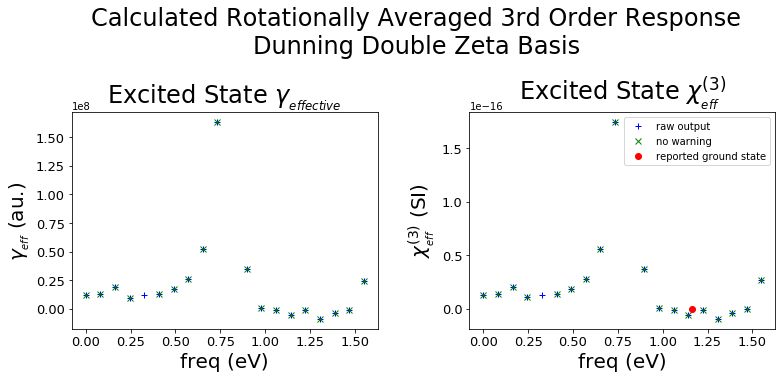

In [86]:
plot_data_frames([output_df_state2, good_df_state2], ['raw output', 'no warning'], "Excited State", plot_measured_ground_state=True)

b 0
+ 0
g 1
x 1


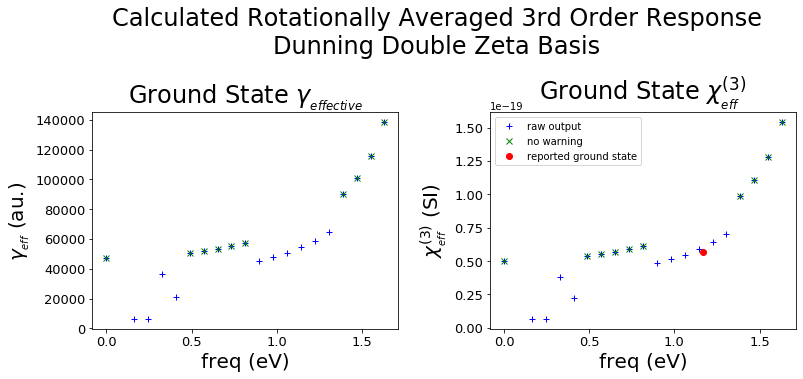

In [87]:
plot_data_frames([output_df_state1, good_df_state1], ['raw output', 'no warning'], "Ground State", plot_measured_ground_state=True)

,freq (Hartree),freq (eV),freq_permutation,gamma effective,chi3 effective,warning_flag
0,0.0544,1.480299,0.0,182010.609113,2.006321e-19,False
3,0.0589,1.602751,0.0,280685.100867,3.117559e-19,False
6,0.0634,1.725202,0.0,604342.846920,6.768519e-19,False


,freq (Hartree),freq (eV),freq_permutation,gamma effective,chi3 effective,warning_flag
1,0.0544,1.480299,1.0,102394.066297,1.128700e-19,False
4,0.0589,1.602751,1.0,128601.468267,1.428372e-19,False
7,0.0634,1.725202,1.0,195612.261220,2.190818e-19,False


,freq (Hartree),freq (eV),freq_permutation,gamma effective,chi3 effective,warning_flag
2,0.0544,1.480299,2.0,102394.066297,1.128700e-19,False
5,0.0589,1.602751,2.0,128601.468267,1.428372e-19,False
8,0.0634,1.725202,2.0,195612.261220,2.190818e-19,False


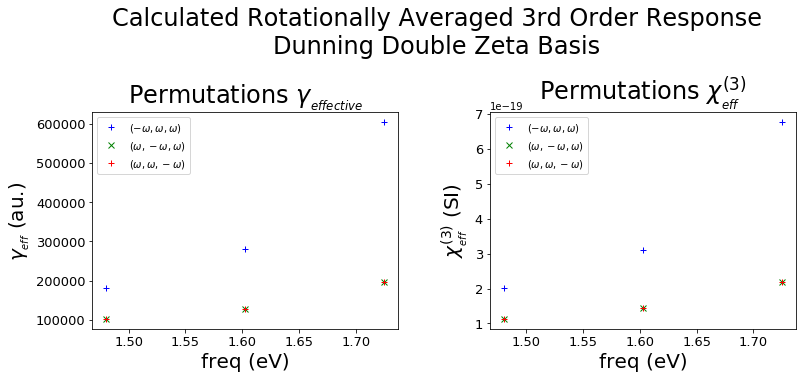

In [101]:
permutation_dfs = []
labels = ["$(-\omega, \omega, \omega )$",
          "$(\omega, -\omega, \omega )$",
          "$(\omega, \omega, -\omega )$"]

for permutation_value in [0, 1, 2]:
    permutation_dfs.append(good_df_freq_perm[good_df_freq_perm.freq_permutation == permutation_value])

plot_data_frames(permutation_dfs, labels, "Permutations", display_the_dfs=True, alpha=1)

In [ ]:
output_df_state2_ev, output_df_state2_hrt = eV_and_hartree(output_df_state2)
output_df_state1_ev, output_df_state1_hrt = eV_and_hartree(output_df_state1)

#display(output_df_state2_ev)
#display(output_df_state2_hrt)

output_df_delta_ev = output_df_state2_ev - output_df_state1_ev
output_df_delta_hrt = output_df_state2_hrt - output_df_state1_hrt

#display(output_df_delta_ev)
#display(output_df_delta_hrt)

output_df_delta = deepcopy(output_df_delta_ev)
output_df_delta['freq (eV)'] = output_df_delta_ev.index
output_df_delta['freq (Hartree)'] = output_df_delta_hrt.index
#display(output_df_delta)

output_df_delta.warning_flag = output_df_state2_ev.warning_flag|output_df_state1_ev.warning_flag
display(output_df_delta)
output_df_delta = output_df_delta.dropna(0)
display(output_df_delta)
good_df_delta = output_df_delta[output_df_delta.warning_flag != True]




In [ ]:
plot_data_frames(output_df_delta, good_df_delta, "Difference between states")

In [ ]:
plt.plot(good_df_state1['freq (eV)'], good_df_state1['chi3 effective'], 'go', label='ground state')
plt.plot(good_df_state2['freq (eV)'], good_df_state2['chi3 effective'], 'bo', label='excited state')
plt.plot([1.1653], [5.7*10**(-20)], 'ro', label="reported ground state")
x_label = "freq (eV)"
y_label = "$\chi^{(3)}_{\t_{eff}}}$ (SI)"
plt.title("Calculated Rotationally Averaged {0}\nWith Lorentz Lorenz Local Field Correction\n{1} Dunning Double Zeta".format("$\chi^{(3)}_{\t_{eff}}}$", ''), fontsize=24, y=1.08)
plt.tick_params(labelsize=13)
plt.ylabel(y_label, fontsize=20)
plt.xlabel(x_label, fontsize=20)
plt.legend()
plt.show()